In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches

In [3]:
# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

# Seaborn style settings
seaborn_cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

## Covariance and correlation

Let us calculate the covariance and correlation for real data using Pandas. First we specify the data file name and have a "peek" at the data frame:

In [4]:
data_file = 'ASC_cg_export.tsv'
df = pd.read_csv(data_file,sep = '\t', low_memory=False)

df

,patient_id,cg00510787,cg03169527,cg23256971,cg08585897
0,0,0.076000,0.031020,0.681708,0.136734
1,1,0.056540,0.041740,0.309939,0.833063
2,2,0.035931,0.027603,0.336823,0.779083
3,3,0.068871,0.029245,0.637028,0.220080
4,4,0.055457,0.031569,0.648768,0.158911
...,...,...,...,...,...
459,459,0.638267,0.725329,0.562665,0.682982
460,460,0.029312,0.037880,0.174917,0.820928
461,461,0.077343,0.030169,0.656111,0.164263
462,462,0.040083,0.032533,0.211228,0.763911


Let's check the column names:

In [6]:
columns = df.columns[1:]

Before actually calculating the variance-covariance matrix, let's simply look at scatter plots, where we plot the value in a given column as a function of the value in another column.

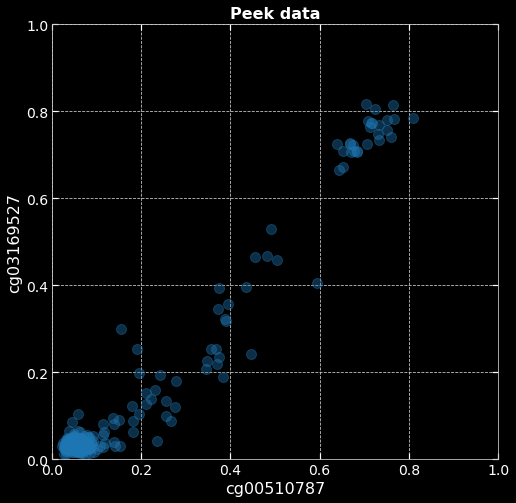

In [7]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*8, nrows*8),
                         facecolor='black', subplot_kw=dict(facecolor='black'))

axistitlesize = 16
axislabelsize = 16
axisticksize = 14
sradius = 10

axes.scatter(df['cg00510787'], df['cg03169527'],
             c='tab:blue', s=sradius**2, alpha=0.4)

axes.set_title('Peek data', fontsize=axistitlesize, fontweight='bold', color='w')
axes.set_xlabel('cg00510787', fontsize=axislabelsize, color='w')
axes.set_ylabel('cg03169527', fontsize=axislabelsize, color='w')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='w')

axes.set_xlim(0,1)
axes.set_ylim(0,1)

plt.show()

Now create a grid of scatter plots as the figure indicates. Try to set the axis labels from the dataset.

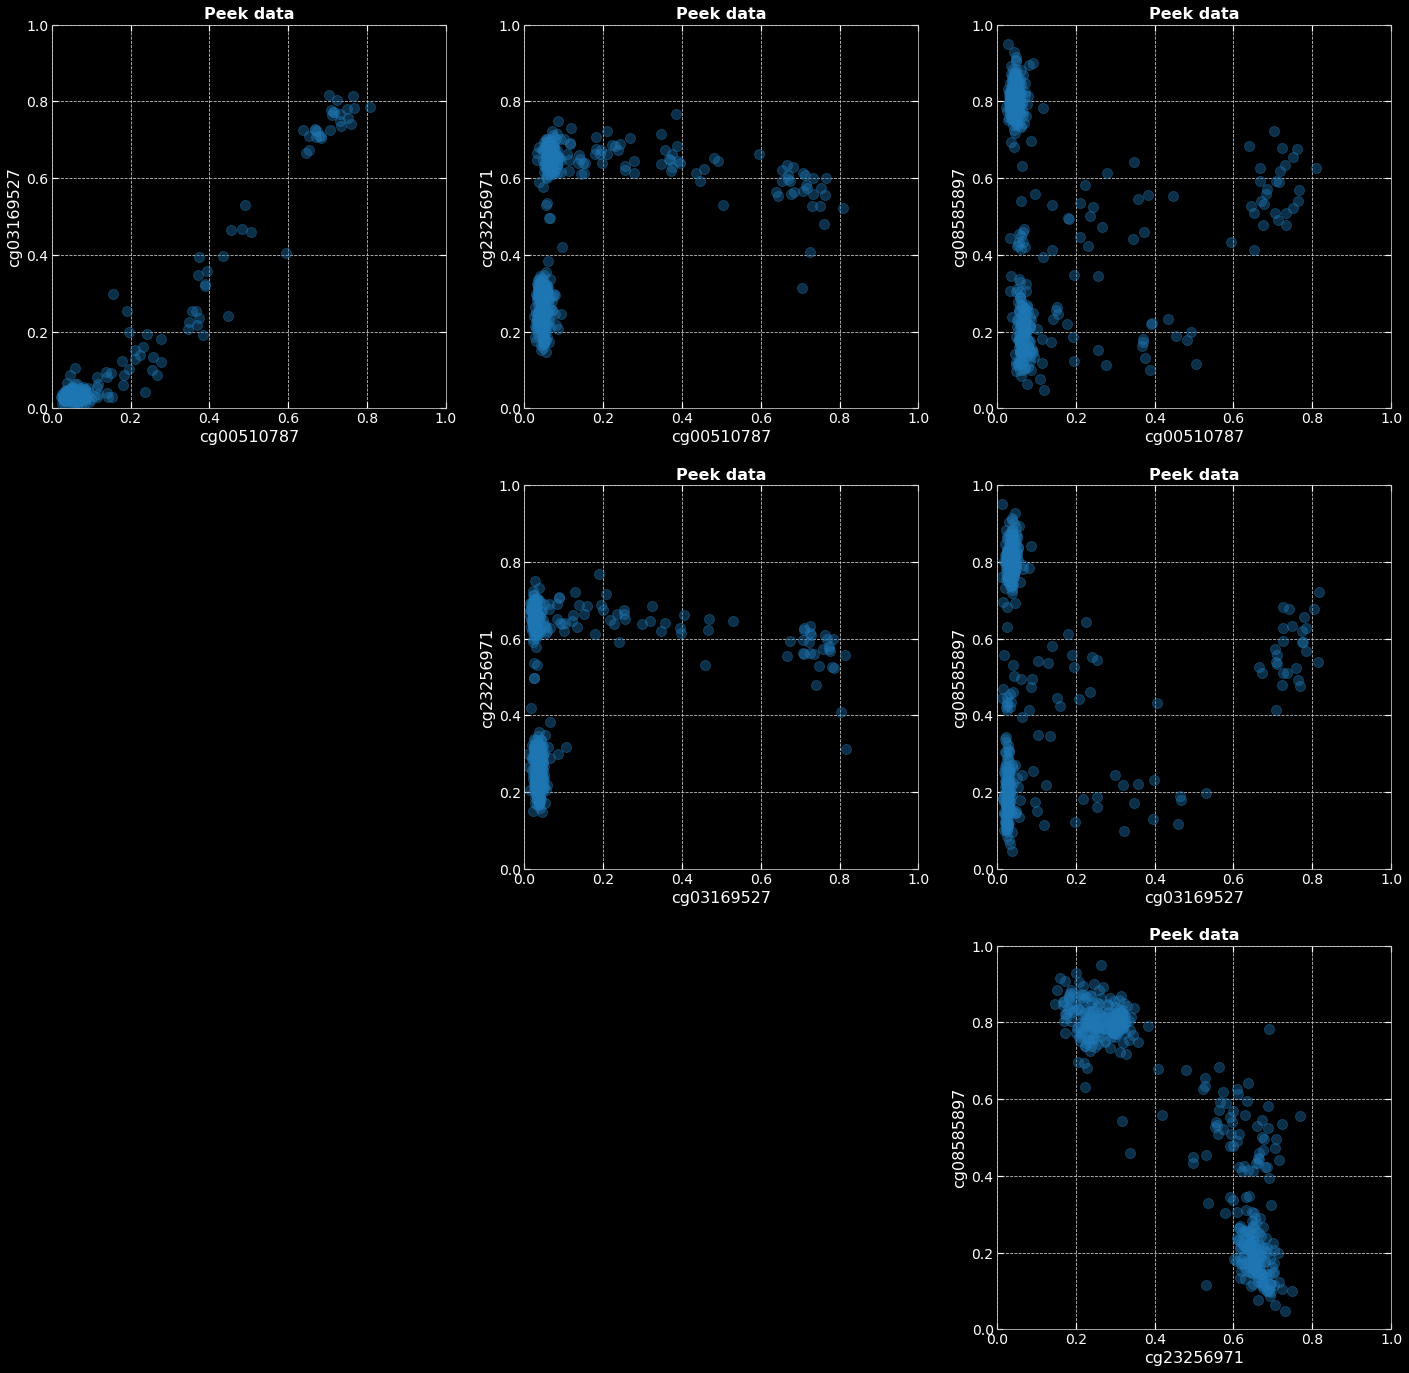

In [9]:
nrows = len(columns) - 1
ncols = len(columns) - 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*8, nrows*8),
                         facecolor='black', subplot_kw=dict(facecolor='black'))

axistitlesize = 16
axislabelsize = 16
axisticksize = 14
sradius = 10

for i, row in enumerate(columns[:-1]):
    for j, col in enumerate(columns[1:]):
        if j >= i:
            axes[i][j].scatter(df[row], df[col],
                               c='tab:blue', s=sradius**2, alpha=0.4)

            axes[i][j].set_title('Peek data', fontsize=axistitlesize, fontweight='bold', color='w')
            axes[i][j].set_xlabel(row, fontsize=axislabelsize, color='w')
            axes[i][j].set_ylabel(col, fontsize=axislabelsize, color='w')
            axes[i][j].tick_params(axis='both', which='major', labelsize=axisticksize, colors='w')

            axes[i][j].set_xlim(0,1)
            axes[i][j].set_ylim(0,1)
        else:
            axes[i][j].axis('off')

plt.show()

Let's now calculate the co-variance and the correlation matrices.

In [6]:
YOUR CODE for covariance

,patient_id,cg00510787,cg03169527,cg23256971,cg08585897
patient_id,17980.000000,0.178541,0.440353,-1.510975,3.369657
cg00510787,0.178541,0.028208,0.029073,0.010195,-0.005973
cg03169527,0.440353,0.029073,0.031262,0.007102,-0.001742
cg23256971,-1.510975,0.010195,0.007102,0.039455,-0.053103
cg08585897,3.369657,-0.005973,-0.001742,-0.053103,0.083898


In [7]:
"your code for correlation: what do you expect in the diagonal"

'your code for correlation: what do you expect in the diagonal?'

Of course, covariance can be calculated also in numpy. To test this, let us first generate a multinomial data set. First we define the parameters of multinomial distribution, $N$ and a couple of $p_i$, where $\sum_i p_i=1$.

In [8]:
N_mn = YOUR_CODE
p_mn = YOUR_CODE # set a list of likelihoods, eg. 4 probabilities
print(sum(p_mn))

In [9]:
multinom_data = YOUR_CODE_FOR_LIST_OF_RANDOM_MULTINOMIAL_DATA, use the built in routines from numpy
#print(multinom_data);

In [12]:
multinom_cov_matr = np.cov(np.transpose(multinom_data));
multinom_cov_matr

array([[ 1.56666667, -1.75555556, -0.51111111,  0.7       ],
       [-1.75555556,  5.37777778, -2.46666667, -1.15555556],
       [-0.51111111, -2.46666667,  4.17777778, -1.2       ],
       [ 0.7       , -1.15555556, -1.2       ,  1.65555556]])

As a comparison, let's also calculate the theoretical variance-covariance matrix.

In [11]:
theor_cov_matr = [[list_of_lists]] # lookup the formulae in wikipedia
for line in theor_cov_matr:
    print(line);

[1.8, -0.4, -0.6, -0.8]
[-0.4, 3.2, -1.2, -1.6]
[-0.6000000000000001, -1.2000000000000002, 4.199999999999999, -2.4000000000000004]
[-0.8, -1.6, -2.4, 4.8]


# Inequalities

Let us assume IID Bernoulli random variables such as coin flips, where we do not know the parameter $p$, and only have access to the generated sample.

Our best guess (estimate) for $p$ based on the observed data is given by

$$
\widehat{p} = \overline{X_n}
=
\frac{1}{n}\sum_{i=1}^{n} x_i.
$$

Hoeffding's inequality states that as $n$ is increased, this estimate is getting exponentialy close to the true value of $p$, since

$$
P \left( \left| \overline{X_{n}} - p \right| \geq \epsilon \right)
\leq
2 e^{-2n \epsilon^{2}} = \alpha.
$$

Based on that we can construct an interval (called confidence interval) around the estimate $\widehat{p}=\overline{X_n}$ for which we can write down a guaranteed lower bound on the probability that the true $p$ falls within the interval. 

Let us choose the guaranteed lower bound as $1-\alpha$, where $\alpha$ is a parameter. For a fixed $\alpha$, the interval can be given as $\left[ X_{n} - \epsilon , X_{n} + \epsilon \right]$ where  

$$
\epsilon = \sqrt{\frac{1}{2n} \ln\left( \frac{2}{\alpha} \right)}, \nonumber
$$

and in such a setting find the formula for the probability, that the interval covers the $p$ value.

$$
P ....
$$

Let us test this by actually generating Bernoulli random variables and measuring the **coverage** of the above interval, where coverage is the ratio of experiments where the true $p$ did fall into the interval.

First, we define the parameters.

In [22]:
p_true = 0.4        # The p parameter of the Bernoulli distribution
num_flips = 50      # The number of data points in one experiment
num_series = 1000   # The number of experiments
alpha = 0.05

Let's just try out generating a small sample.

In [49]:
Bernoulli_samp = np.random.binomial(n=1, p=p_true, size=num_flips) # use numpy!
print(Bernoulli_samp)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1
 1 1 0 0 1 1 0 0 1 0 1 0 0]


OK, it seems working, let's now generate the longer samples.

In [51]:
B_series = np.array([np.random.binomial(n=1, p=p_true, size=num_flips) for i in range(num_series)])

And finally let's see how does the coverage depend on the number of flips. 

In [29]:
epsilon_list = np.zeros(num_flips)
cover_list = np.zeros(num_flips)

for n in range(1, num_flips):
    epsilon = np.sqrt(1/(2*n) * np.log(2/alpha))
    epsilon_list[n-1] = epsilon

    cover_indicator = [1 if p_true-n.mean(b_s[:n]) for b_s in B_series]
    coverage = YOUR_CODE
    cover_list[n-1] = coverage  
    #print('n=',n,'coverage=',coverage)

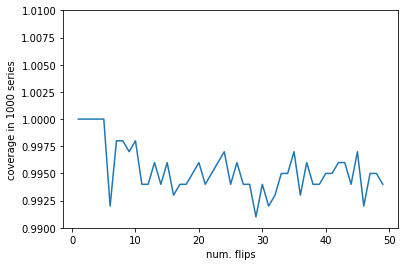

In [30]:
plt.clf();
x_list = range(1,len(cover_list)+1);
plt.plot(x_list,cover_list);
plt.ylim(0.99,1.01);
plt.xlabel('num. flips');
plt.ylabel('coverage in '+str(num_series)+' series');
plt.show();